No handles with labels found to put in legend.


[0.00049422 0.99950576]


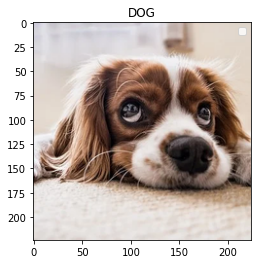

In [ ]:
#https://teachablemachine.withgoogle.com/train/image

import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/content/keras_model')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/test.png')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction[0])

#prediction[row][column]
if (prediction[0][0] > prediction[0][1]):
  x = "CAT"
  accuracy= prediction[0][0] * 100
else:
  x = "DOG"
  accuracy= prediction[0][0] * 100

import matplotlib.pyplot as plt
plt.title(x)
plt.imshow(image,label=accuracy)
plt.legend()
plt.show()



